## Computer Vision(CS 436, CS5310, EE513) Programming Assignment#3 Part#1

### Currently there are lots of professional cartoonizer applications available in the market but most of the them are not freeware, you don't need powerful rendering software or even years of experience to develop such an application(as you will see in this assignment) All you need is essentially a bilateral filter and some edge detection. You are allowed to use opencv for this assigment

## Step#1
### In this step we will be applying a bilateral filter on our input image. A bilateral filter is used for smoothening images and reducing noise, while preserving edges, because a bilateral filter smooths flat regions while keeping edges sharp, it is ideally suited to convert an RGB image into a cartoon. Unfortunately, bilateral filters are orders of magnitudes slower than other smoothing operators (e.g., Gaussian blur). Thus, if speed is important, it might be a good idea to operate on a down-scaled version of the original image first and then upscale it afterwards.

In [2]:
#required imports
import matplotlib
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import image as mpimg
from matplotlib.pyplot import figure
import cv2
%matplotlib inline

In [28]:
a = [1,2]

for i in reversed(range(len(a))):
    print (i)

1
0


(394, 700, 3)


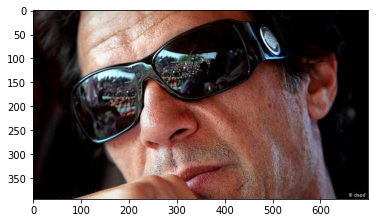

In [30]:

pic = cv2.imread("1.jpg")

plt.imshow(cv2.cvtColor(pic, cv2.COLOR_BGR2RGB))
print(pic.shape)

In [31]:
#TO DO
#step 1
#Use bilateral filter for edge-aware smoothing.

num_down =  2# number of downsampling steps 
num_bilateral = 2
downed_list = [pic]
for i in range(num_down):
    pic = cv2.pyrDown(pic)
    downed_list.append(pic)
# repeatedly apply small bilateral filter instead of
# applying one large filter
for i in range(num_bilateral):
    pic = cv2.bilateralFilter(pic, 5,5,7)
    
downed_list[num_down] = pic

# upsample image to original size (see opencv 'pyrUp()' function)
for i in reversed(range(num_down)):
    size = (downed_list[i].shape[1], downed_list[i].shape[0])
    pic = cv2.pyrUp(pic, dstsize = size)


(394, 700, 3)


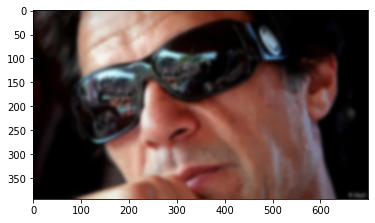

In [32]:

plt.imshow(cv2.cvtColor(pic, cv2.COLOR_BGR2RGB))
print(pic.shape)

## Step#2
### In this step we will blur the original image. This is considered as a pre-processing step before we move on towards the edge detection step. We will apply a median filter on the image, which replaces each pixel value with the median value of all the pixels in a small neighborhood.

In [33]:
#TO DO
#step 2
gray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
#plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
gray =cv2.medianBlur(gray,7)



## Step#3

### In this step we will create an edge mask from the output produced in step#2 using adaptive thresholding 

In [34]:
#TO DO
#step 3

# detect and enhance edges(see opencv 'adaptiveThreshold()' function)
res = cv2.adaptiveThreshold(gray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21,3)

(394, 700)

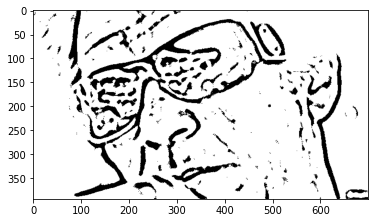

In [37]:
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
res.shape

## Final Step

### In this step we will combine the output produced in step#1 and step#3 using a bitwise and operator to produce our final output.(Note: You need to convert output from step#3 to color first)

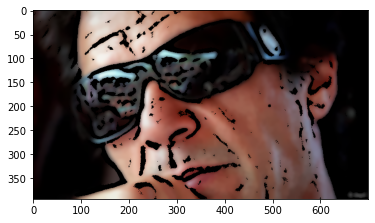

In [38]:
#TO DO
#Final Step
# convert back to color, bit-AND with color image
color = cv2.cvtColor(res, cv2.COLOR_GRAY2RGB)
anded = cv2.bitwise_and(pic,color)

#show output
plt.imshow(cv2.cvtColor(anded, cv2.COLOR_BGR2RGB))